# Imports

In [1]:
# Imports

import kagglehub
import pandas as pd
import numpy as np
import sklearn.utils as skut
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, r2_score
from IPython.display import Markdown
from sklearn.calibration import LinearSVC
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV


# Data collection and preparation

In [2]:
# Downloading dataset

path = kagglehub.dataset_download("denkuznetz/traffic-accident-prediction")
file = "dataset_traffic_accident_prediction1.csv"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\testk\.cache\kagglehub\datasets\denkuznetz\traffic-accident-prediction\versions\1


In [3]:
# Reading dataset with pandas

dataset = pd.read_csv(f'{path}/{file}', encoding = "ISO-8859-1")
dataset.head(20)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,NaN,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


In [4]:
# Dataset statistics

dataset.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [6]:
# Handling missing values

dataset.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [7]:
# Taking care of duplicates

df = dataset

df.duplicated().sum() 

14

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
# Ensure we're working on a copy of the DataFrame to avoid warnings
df = df.copy()

# Filling NaN values for numeric fields
numeric_fields = ['Driver_Experience', 'Speed_Limit', 'Number_of_Vehicles', 
                  'Driver_Alcohol', 'Traffic_Density', 'Driver_Age', 'Accident']

for field in numeric_fields:
    df[field] = df[field].fillna(df[field].mean()).astype(int)

# Handling non-numeric fields
categorical_fields = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 
                      'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']

for field in categorical_fields:
    df[field] = df[field].fillna(df[field].mode()[0])
    
# Check for remaining NaN values
print(df.isnull().sum())
df

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1,100,5,0,Low,Wet,Car,51,48,Artificial Light,0
1,Clear,Rural Road,Night,0,120,3,0,Moderate,Wet,Truck,49,43,Artificial Light,0
2,Rainy,Highway,Evening,1,60,4,0,Low,Icy,Car,54,52,Artificial Light,0
3,Clear,City Road,Afternoon,2,60,3,0,Low,Under Construction,Bus,34,31,Daylight,0
4,Rainy,Highway,Morning,1,195,11,0,Low,Dry,Car,62,55,Artificial Light,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2,30,4,0,Low,Dry,Car,23,15,Daylight,0
836,Rainy,Rural Road,Evening,2,60,4,0,Low,Dry,Motorcycle,52,46,Daylight,1
837,Foggy,Highway,Evening,0,30,4,1,High,Dry,Car,43,34,Artificial Light,0
838,Foggy,Highway,Afternoon,2,60,3,0,Low,Dry,Car,25,19,Artificial Light,0


In [10]:
# Encoding labels for accident severity

label_encoder = preprocessing.LabelEncoder() 

df['Accident_Severity']= label_encoder.fit_transform(df['Accident_Severity'])

df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1,100,5,0,1,Wet,Car,51,48,Artificial Light,0
1,Clear,Rural Road,Night,0,120,3,0,2,Wet,Truck,49,43,Artificial Light,0
2,Rainy,Highway,Evening,1,60,4,0,1,Icy,Car,54,52,Artificial Light,0
3,Clear,City Road,Afternoon,2,60,3,0,1,Under Construction,Bus,34,31,Daylight,0
4,Rainy,Highway,Morning,1,195,11,0,1,Dry,Car,62,55,Artificial Light,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2,30,4,0,1,Dry,Car,23,15,Daylight,0
836,Rainy,Rural Road,Evening,2,60,4,0,1,Dry,Motorcycle,52,46,Daylight,1
837,Foggy,Highway,Evening,0,30,4,1,0,Dry,Car,43,34,Artificial Light,0
838,Foggy,Highway,Afternoon,2,60,3,0,1,Dry,Car,25,19,Artificial Light,0


In [11]:
# One-Hot Encoding

df = pd.get_dummies(df, columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'], drop_first = True)

df


,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,...,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
0,1,100,5,0,1,51,48,0,False,True,...,True,False,False,False,True,True,False,False,False,False
1,0,120,3,0,2,49,43,0,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1,60,4,0,1,54,52,0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,2,60,3,0,1,34,31,0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,195,11,0,1,62,55,1,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2,30,4,0,1,23,15,0,False,False,...,False,True,False,False,False,True,False,False,True,False
836,2,60,4,0,1,52,46,1,False,True,...,False,False,False,False,False,False,True,False,True,False
837,0,30,4,1,0,43,34,0,True,False,...,False,False,False,False,False,True,False,False,False,False
838,2,60,3,0,1,25,19,0,True,False,...,False,False,False,False,False,True,False,False,False,False


# Data analysis

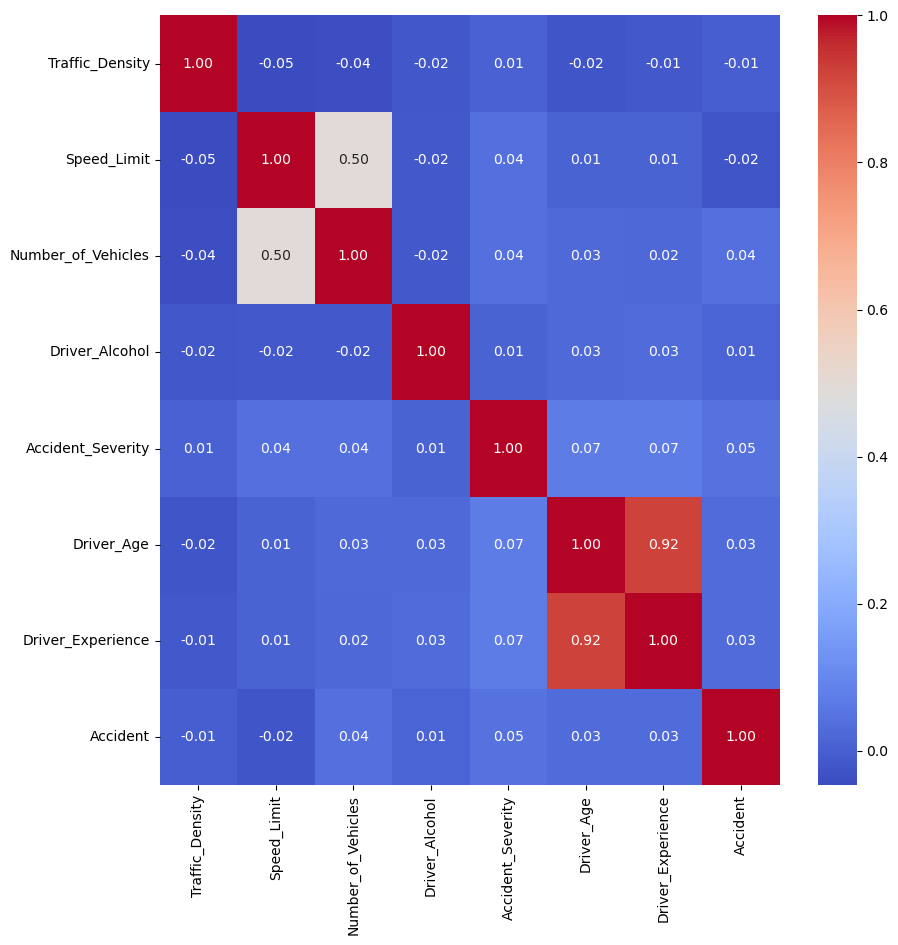

In [12]:
# Correlation matrix

numeric_fields = df.select_dtypes(include=['number'])

correlations = numeric_fields.corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(correlations, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f")

plt.show()

In [13]:
# Grabbing column names

column_names = df.columns
print(column_names)

Index(['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
       'Driver_Alcohol', 'Accident_Severity', 'Driver_Age',
       'Driver_Experience', 'Accident', 'Weather_Foggy', 'Weather_Rainy',
       'Weather_Snowy', 'Weather_Stormy', 'Road_Type_Highway',
       'Road_Type_Mountain Road', 'Road_Type_Rural Road',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Road_Condition_Icy', 'Road_Condition_Under Construction',
       'Road_Condition_Wet', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_Truck', 'Road_Light_Condition_Daylight',
       'Road_Light_Condition_No Light'],
      dtype='object')


In [14]:
# Scaling the data to achieve mean value of 0 and deviation of 1

to_scale = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
scaler = RobustScaler()

df[to_scale] = scaler.fit_transform(df[to_scale])
df

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,...,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
0,1,1.333333,1.0,0,1,0.333333,0.384615,0,False,True,...,True,False,False,False,True,True,False,False,False,False
1,0,2.000000,0.0,0,2,0.250000,0.192308,0,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1,0.000000,0.5,0,1,0.458333,0.538462,0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,2,0.000000,0.0,0,1,-0.375000,-0.269231,0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,4.500000,4.0,0,1,0.791667,0.653846,1,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2,-1.000000,0.5,0,1,-0.833333,-0.884615,0,False,False,...,False,True,False,False,False,True,False,False,True,False
836,2,0.000000,0.5,0,1,0.375000,0.307692,1,False,True,...,False,False,False,False,False,False,True,False,True,False
837,0,-1.000000,0.5,1,0,0.000000,-0.153846,0,True,False,...,False,False,False,False,False,True,False,False,False,False
838,2,0.000000,0.0,0,1,-0.750000,-0.730769,0,True,False,...,False,False,False,False,False,True,False,False,False,False


# Dividing the data into training and test sets

In [15]:
# Splitting the dataset into training and testing sets

x = df.drop(['Accident'], axis = 1)
y = df['Accident']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.33, random_state=100) 

# Choosing a model

In [16]:
# Grid searching for the best model & parameters

def gen_model1():
    model = Pipeline([
        ('regr', LogisticRegression()),
    ])
    return model

model_gs1 = gen_model1()

params = [
#    {
#         'regr': [SVC()],
#         'regr__kernel': ['linear', 'rbf', 'sigmoid'],
#         'regr__C': [0.1, 0.5, 1, 3, 4, 5, 10],
#     },
    # {
    #     'regr': [RandomForestClassifier()],
    #     'regr__n_estimators': [20, 30, 50, 100],
    #     'regr__max_depth': [None, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12],
    #     'regr__min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #     'regr__min_samples_leaf': [1, 2, 4, 5, 6, 7, 8, 9, 10],
    #     'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # },
    # {
    #     'regr': [DecisionTreeClassifier()],
    #     'regr__max_depth': [None, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12],
    #     'regr__min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #     'regr__min_samples_leaf': [1, 2, 4, 5, 6, 7, 8, 9, 10],
    #     'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # }

    {
        'regr': [RandomForestClassifier()],
        'regr__n_estimators': [20, 30, 50],
        'regr__max_depth': [None, 1, 2, 3],
        'regr__min_samples_split': [1, 2, 3],
        'regr__min_samples_leaf': [1, 2, 4],
        'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    },
    {
        'regr': [DecisionTreeClassifier()],
        'regr__max_depth': [None, 1, 2, 3],
        'regr__min_samples_split': [1, 2, 3],
        'regr__min_samples_leaf': [1, 2, 4],
        'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    }
]

grid = GridSearchCV(model_gs1, params, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')

grid.fit(train_x, train_y)


c:\Users\testk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\testk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\testk\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\testk\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator

GridSearchCV(cv=3, estimator=Pipeline(steps=[('regr', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'regr': [RandomForestClassifier()],
                          'regr__max_depth': [None, 1, 2, 3],
                          'regr__min_samples_leaf': [1, 2, 4],
                          'regr__min_samples_split': [1, 2, 3],
                          'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                          'regr__n_estimators': [20, 30, 50]},
                         {'regr': [DecisionTreeClassifier()],
                          'regr__max_depth': [None, 1, 2, 3],
                          'regr__min_samples_leaf': [1, 2, 4],
                          'regr__min_samples_split': [1, 2, 3],
                          'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.2]}],
             refit='f1', scoring=['accuracy', 'f1'])

In [102]:
# Printing out grid search results

def displmd(*args, **kwargs): 
              display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

cvres = grid.cv_results_
cvresults = pd.DataFrame(cvres)

displmd(
    "# Grid search results - all data - all params",
    "## ",
    cvresults[["mean_test_f1", "rank_test_f1", "mean_test_accuracy", "params"]]
    .sort_values(by="rank_test_f1")
    .apply(lambda x: ({"f1": f"${x['mean_test_f1']:.5f}$", "acc": f"${x['mean_test_accuracy']:.5f}$", "params": f"`{x['params']}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)

# Grid search results - all data - all params

## 

|       | f1        | acc       | params                                                                                                                                                          |
|------:|:----------|:----------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 25953 | $0.32464$ | $0.58779$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': None, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 3, 'regr__min_weight_fraction_leaf': 0.0}` |
| 29727 | $0.32203$ | $0.60953$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 8, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 2, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 31905 | $0.32193$ | $0.57516$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 12, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 5, 'regr__min_weight_fraction_leaf': 0.0}`   |
| 29307 | $0.32168$ | $0.63847$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 7, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 2, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 25965 | $0.31865$ | $0.57515$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': None, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 5, 'regr__min_weight_fraction_leaf': 0.0}` |
| 29349 | $0.31302$ | $0.63485$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 7, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 9, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 29331 | $0.31302$ | $0.63485$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 7, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 6, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 29313 | $0.31302$ | $0.63485$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 7, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 3, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 29739 | $0.31293$ | $0.61501$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 8, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 4, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 29355 | $0.31183$ | $0.63304$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 7, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 10, 'regr__min_weight_fraction_leaf': 0.0}`   |
| 29325 | $0.30799$ | $0.63487$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 7, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 5, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 31899 | $0.30773$ | $0.56792$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 12, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 4, 'regr__min_weight_fraction_leaf': 0.0}`   |
| 29337 | $0.30752$ | $0.63666$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 7, 'regr__min_samples_leaf': 4, 'regr__min_samples_split': 7, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 30291 | $0.30636$ | $0.60589$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 9, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 6, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 29745 | $0.30618$ | $0.61678$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 8, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 5, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 30483 | $0.30581$ | $0.62211$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 9, 'regr__min_samples_leaf': 5, 'regr__min_samples_split': 8, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 29757 | $0.30184$ | $0.61675$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 8, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 7, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 25947 | $0.30180$ | $0.56430$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': None, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 2, 'regr__min_weight_fraction_leaf': 0.0}` |
| 30489 | $0.30139$ | $0.62571$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 9, 'regr__min_samples_leaf': 5, 'regr__min_samples_split': 9, 'regr__min_weight_fraction_leaf': 0.0}`    |
| 30819 | $0.30138$ | $0.59508$ | `{'regr': DecisionTreeClassifier(), 'regr__max_depth': 10, 'regr__min_samples_leaf': 1, 'regr__min_samples_split': 4, 'regr__min_weight_fraction_leaf': 0.0}`   |

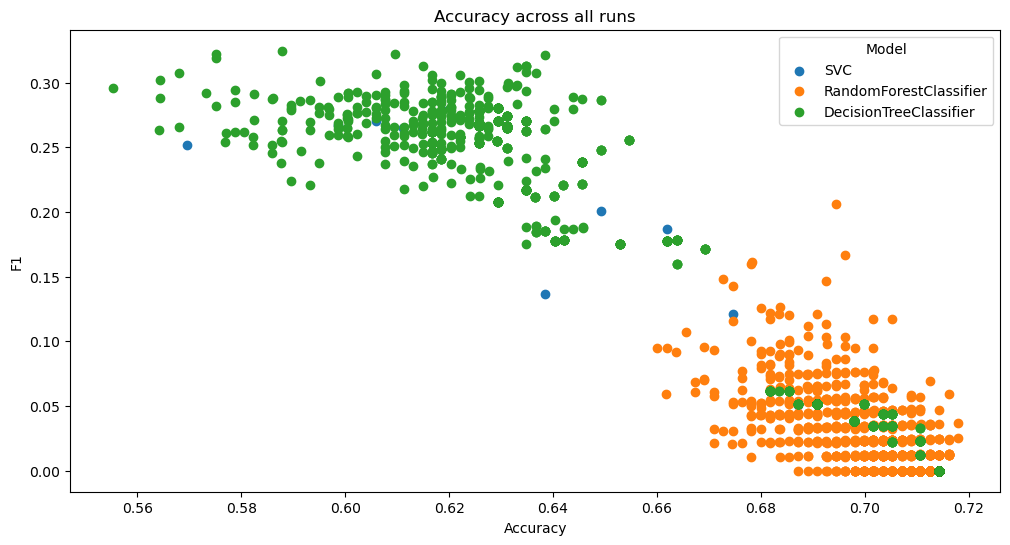

In [107]:
# Visualizing the grid search

results = pd.DataFrame(grid.cv_results_)

results['model'] = results['param_regr'].apply(lambda x: type(x).__name__)

plt.figure(figsize=(12, 6))

for model_name in results['model'].unique():
    model_data = results[results['model'] == model_name]
    plt.scatter(
        model_data['mean_test_accuracy'],
        model_data['mean_test_f1'],
        label=model_name
    )

plt.title("Accuracy across all runs")
plt.xlabel("Accuracy")
plt.ylabel("F1")
plt.legend(title = "Model")

plt.show()



In [ ]:
# Retraining on whole dataset

model = grid.best_estimator_

model.fit(train_x, train_y)

model.score(test_x, test_y)

0.6043956043956044

In [105]:
# Validation function

from sklearn.metrics import accuracy_score, recall_score, auc

METRICS = [
    (f1_score, "f1_score"),
    (accuracy_score, "accuracy"),
    (recall_score, "recall"),
]

def validate(y_pred_test, y_pred_train, train_y, test_y, title="Model Evaluation"):
    outcomes = []

    for m, name in METRICS:
        outcomes.append([name, m(test_y, y_pred_test), m(train_y, y_pred_train)])

    df = pd.DataFrame(outcomes, columns=['metric', 'test', 'train'])
    df = df.set_index('metric')

    print(title)
    print(df)

    displmd(
        f"# {title}",
        f"## Valitation output",
        df.to_markdown()
    )
    
    cm_test = confusion_matrix(test_y, y_pred_test)
    cm_train = confusion_matrix(train_y, y_pred_train)

    fig, axs = plt.subplots(1, 2)

    # set size
    fig.set_size_inches(12, 5)

    axs[0].set_title('Test Confusion Matrix')
    axs[0].matshow(cm_test, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_test):
        axs[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    axs[1].set_title('Train Confusion Matrix')
    axs[1].matshow(cm_train, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_train):
        axs[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    plt.show()

Model Evaluation
              test     train
metric                      
f1_score  0.250000  0.950166
accuracy  0.604396  0.972875
recall    0.236842  0.905063


# Model Evaluation

## Valitation output

| metric   |     test |    train |
|:---------|---------:|---------:|
| f1_score | 0.25     | 0.950166 |
| accuracy | 0.604396 | 0.972875 |
| recall   | 0.236842 | 0.905063 |

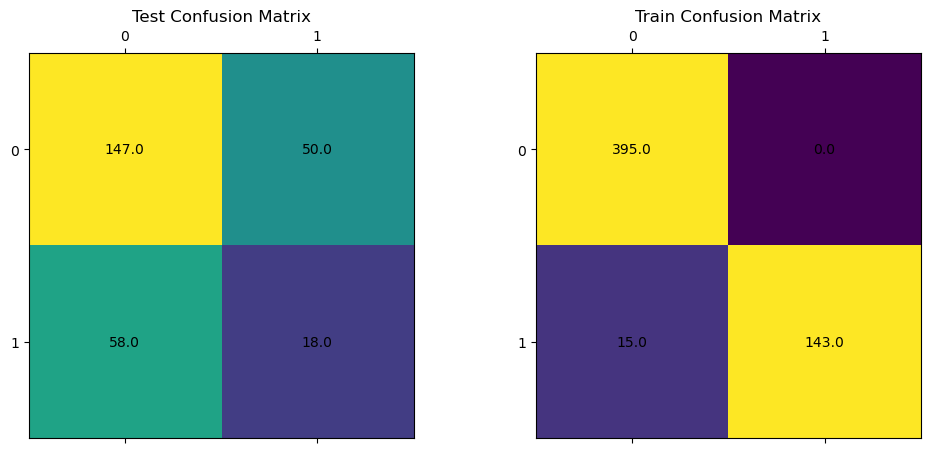

In [106]:
test_y_prediction = model.predict(test_x)
train_y_prediction = model.predict(train_x)

validate(test_y_prediction, train_y_prediction, train_y, test_y)